In [4]:
%load_ext sql
%sql postgresql://appdev@data/appdev

'Connected: appdev@appdev'

In [13]:
%%sql
drop view geoview;
create view geoview as
select * from geonames
where population in (select max(population) from geonames)

Done.
Done.


[]

In [15]:
%%sql
select * from geoview

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


In [22]:
%%sql
select (select point(geoview.longitude, geoview.latitude) from geoview) <-> 
point(geonames.longitude, geonames.latitude) 
as distance, name from geonames 
order by distance
desc
limit 5; 

5 rows affected.


distance,name
243.041567580299,Eckins Nunatak
226.392811281631,Nairn River
226.321369487677,Waikato
224.32621893127,Cox Peaks
221.784518170228,Tuvumatha


In [ ]:
# Showing the 5 locations that was the furthest away

In [23]:
%%sql
CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

In [27]:
%%sql
select public.geodistance(geonames.longitude, geonames.latitude, geoview.longitude, geoview.latitude),
geonames.name from geonames cross join geoview limit 5;

5 rows affected.


geodistance,name
2447.02064247823,Obac de la Vall
2448.31370315787,Canal del Teixó
2445.30508219456,Solana del Soriguer
2447.21932099428,Bosc de Sant Romà
2447.38555627568,Sant Esteve


In [35]:
%%sql 
drop view scatterplot;
create view scatterplot as
select latitude, longitude, population 
from geonames order by population 
desc 
limit 1000;

Done.
Done.


[]

In [29]:
%%sql
select * from scatterplot;

1 rows affected.


latitude,longitude,population
34.0,36.0,44990000


In [33]:
%matplotlib inline

In [36]:
result = %sql select latitude, longitude from scatterplot;

1000 rows affected.


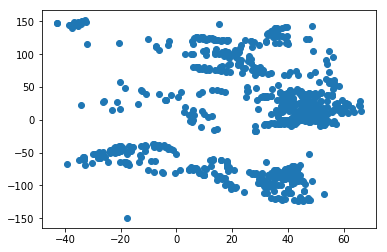

In [39]:
import matplotlib.pyplot as plot
listone, listtwo = zip(*result)
plot.scatter(listone, listtwo)
plot.show();

In [42]:
%%sql
select data from cards where data @> '{"artist":"Rob Alexander"}' limit 1;

1 rows affected.


data
"{'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': ""Double target player's life total. Shuffle Beacon of Immortality into its owner's library."", 'type': 'Instant', 'types': ['Instant'], 'artist': 'Rob Alexander', 'colors': ['White'], 'flavor': 'The cave floods with light. A thousand rays shine forth and meld into one.', 'layout': 'normal', 'number': '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']}"


In [45]:
%%sql
select data from cards where data @> '{"subtypes":["Human"]}' limit 1;

1 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"


In [46]:
%%sql
select data from cards limit 1;

1 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
